This is the linear regression work on my own research. Literally we are talking about the relationship between the dimensionless functions named "aspect ratio" and "dimensionless plug bar size". The former one indicates the half-width to depth ratio in a river channel. The second one, is somehow a little bit complex. For a meandering river system, river channel tends to cut itself off, a shorter route replaces the previous channel and a river bifurcation-confluence loop is generated. Later on a sediment deposition will occur at the entrence of the previous channel and it is called as the "plug bar", here we study the relationship between the aspect ratio in the upstream channel and the size of the plug bar. The data is from the excel sheet named "bar_length.xlsx", which is results from numerical modellings.

In [2]:
""" Import libraries """
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [4]:
# load the data
file_path = "bar_length.xlsx"
bar_data = pd.read_excel(file_path, sheet_name='aspect', header=None)

# show the contents
bar_data.head()

,0,1,2,3,4,5,6
0,NaN,aspect,NaN,NaN,NaN,NaN,NaN
1,Lc,10,12.0,14.0,16.0,18.0,20.0
2,1,5,5.0,4.0,4.0,4.0,4.0
3,5,11,10.0,9.0,9.0,8.0,7.0
4,10,17,15.0,14.0,13.0,13.0,12.0


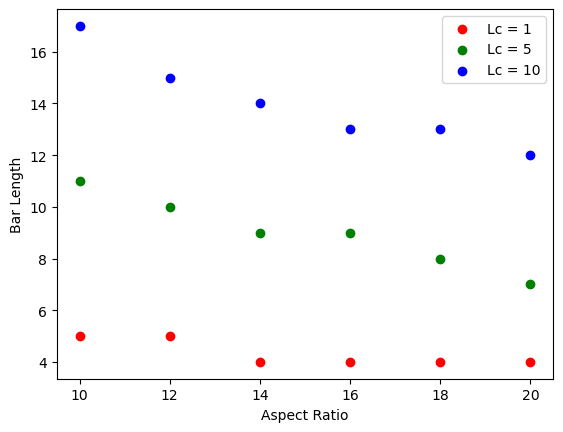

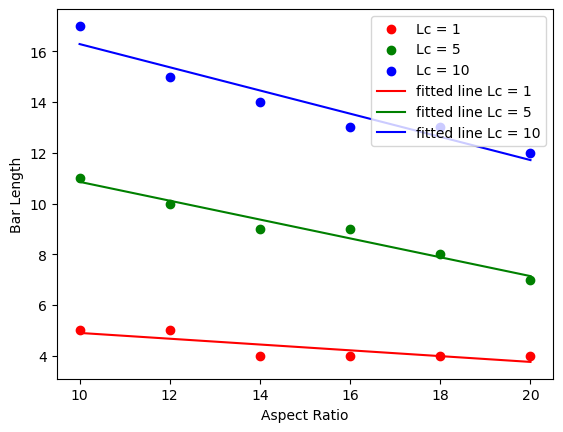

Lc = 1: slope = -0.11428571428571428 intercept = 6.0476190476190474 r_value = -0.828078671210825 p_value = 0.041794680456045286 std_err = 0.038685897164933154
Lc = 5: slope = -0.37142857142857144 intercept = 14.571428571428571 r_value = -0.9827076298239907 p_value = 0.0004459536647407984 std_err = 0.0349927106111883
Lc = 10: slope = -0.45714285714285713 intercept = 20.857142857142858 r_value = -0.9561828874675149 p_value = 0.0028378459267344486 std_err = 0.06998542122237653


In [23]:
"""Filter the data, delect the first row, and seperate the following rows into four columns."""
# filter the data
bar_data_filtered = bar_data.drop(index=0)

# show the contents
bar_data_filtered.head()

# create four rows, named "aspect ratio","bar_length_for_Lc = 1","bar_length_for_Lc = 5", and "bar_length_for_Lc = 10", define each row from bar_data_filtered into these four rows.
aspect_ratio = bar_data_filtered.iloc[0,1:7]
bar_length_for_Lc_1 = bar_data_filtered.iloc[1,1:7]
bar_length_for_Lc_5 = bar_data_filtered.iloc[2,1:7]
bar_length_for_Lc_10 = bar_data_filtered.iloc[3,1:7]

# show the contents
aspect_ratio.head()
bar_length_for_Lc_1.head()
bar_length_for_Lc_5.head()
bar_length_for_Lc_10.head()

# scatter these data, the x axis is aspect ratio, the y axis is bar length, and use different colors to represent different Lc values.
plt.scatter(aspect_ratio, bar_length_for_Lc_1, color='r', label='Lc = 1')
plt.scatter(aspect_ratio, bar_length_for_Lc_5, color='g', label='Lc = 5')
plt.scatter(aspect_ratio, bar_length_for_Lc_10, color='b', label='Lc = 10')
plt.xlabel('Aspect Ratio')
plt.ylabel('Bar Length')
plt.legend()
plt.show()

# perform linear regression on these data, and plot the linear regression line.
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = scipy.stats.linregress(aspect_ratio.astype(float), bar_length_for_Lc_1.astype(float))
slope_5, intercept_5, r_value_5, p_value_5, std_err_5 = scipy.stats.linregress(aspect_ratio.astype(float), bar_length_for_Lc_5.astype(float))
slope_10, intercept_10, r_value_10, p_value_10, std_err_10 = scipy.stats.linregress(aspect_ratio.astype(float), bar_length_for_Lc_10.astype(float))
plt.scatter(aspect_ratio, bar_length_for_Lc_1, color='r', label='Lc = 1')
plt.scatter(aspect_ratio, bar_length_for_Lc_5, color='g', label='Lc = 5')
plt.scatter(aspect_ratio, bar_length_for_Lc_10, color='b', label='Lc = 10')
plt.plot(aspect_ratio, intercept_1 + slope_1*aspect_ratio.astype(float), 'r', label='fitted line Lc = 1')
plt.plot(aspect_ratio, intercept_5 + slope_5*aspect_ratio.astype(float), 'g', label='fitted line Lc = 5')
plt.plot(aspect_ratio, intercept_10 + slope_10*aspect_ratio.astype(float), 'b', label='fitted line Lc = 10')
plt.xlabel('Aspect Ratio') 
plt.ylabel('Bar Length')
plt.legend()
plt.show()
# print the linear regression results
print("Lc = 1: slope =", slope_1, "intercept =", intercept_1, "r_value =", r_value_1, "p_value =", p_value_1, "std_err =", std_err_1)
print("Lc = 5: slope =", slope_5, "intercept =", intercept_5, "r_value =", r_value_5, "p_value =", p_value_5, "std_err =", std_err_5)
print("Lc = 10: slope =", slope_10, "intercept =", intercept_10, "r_value =", r_value_10, "p_value =", p_value_10, "std_err =", std_err_10)